In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.stats import entropy
from numpy.random import default_rng

import pandas as pd

In [2]:
f = pd.read_hdf("events_anomalydetection_DelphesPythia8_v2_qcd_features.h5")

In [3]:
G = (f[['pxj1','pxj2', 'pyj1', 'pyj2']]).to_numpy()
px1 = G[:, 0]
py1 = G[:, 2]
px2 = G[:, 1]
py2 = G[:, 3]

In [4]:
phi1_i = np.arctan2(py1, px1)
phi2_i = np.arctan2(py2, px2)

In [5]:
X = np.transpose([px1, py1, px2, py2])

def rotate(t, X):
    s1 = np.sin(t[0])
    c1 = np.cos(t[0])
    s2 = np.sin(t[1])
    c2 = np.cos(t[1])
    s3 = np.sin(t[2])
    c3 = np.cos(t[2])
    s4 = np.sin(t[3])
    c4 = np.cos(t[3])
    s5 = np.sin(t[4])
    c5 = np.cos(t[4])
    s6 = np.sin(t[5])
    c6 = np.cos(t[5])
    R1 = np.array([[c1, s1, 0.0, 0.0], [-1.0*s1, c1, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]]) #px1 -> py1     
    R2 = [[c2, 0.0, s2, 0.0], [0.0, 1.0, 0.0, 0.0], [-1.0*s2, 0.0, c2, 0.0], [0.0, 0.0, 0.0, 1.0]] #px1 -> px2
    R3 = [[c3, 0.0, 0.0, s3], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [-1.0*s3, 0.0, 0.0, c3]] #px1 -> py2
    R4 = [[1.0, 0.0, 0.0, 0.0], [0.0, c4, s4, 0.0], [0.0, -1.0*s4, c4, 0.0], [0.0, 0.0, 0.0, 1.0]] #px2 -> py1
    R5 = [[1.0, 0.0, 0.0, 0.0], [0.0, c5, 0.0, s5], [0.0, 0.0, 1.0, 0.0], [0.0, -1.0*s5, 0.0, c5]] #px2 -> py1
    R6 = [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, c6, s6], [0.0, 0.0, -1.0*s6, c6]] #py1 -> py2
    S = R1 @ R2 @ R3 @ R4 @ R5 @ R6
    return X @ S

In [6]:
#Control:
N = 225
rng = default_rng()
T = rng.uniform(-np.pi, np.pi, (6, N))

In [7]:
b = 100
KL_rand1 = [entropy(np.histogram(phi1_i, bins=b)[0], np.histogram(np.arctan2(rotate(T[:,initnr], X)[:, 1], rotate(T[:,initnr], X)[:, 0]), bins=b)[0]) for initnr in range(T.shape[1])]

KL_rand2 = [entropy(np.histogram(phi2_i, bins=b)[0], np.histogram(np.arctan2(rotate(T[:,initnr], X)[:, 3], rotate(T[:,initnr], X)[:, 2]), bins=b)[0]) for initnr in range(T.shape[1])]

In [32]:
def graph_phi1(ax, initnr):
    Y = rotate(T[:,initnr], X)
    phi_f = np.arctan2(Y[:, 1], Y[:, 0])
    ax.hist(phi_f, density=True, bins=100)
    ax.set_xlabel(r"$\tilde\phi_{1}$")
    ax.set_ylabel(r"$p(\tilde\phi_{1})$")
    return

def graph_phi2(ax, initnr):
    Y = rotate(T[:,initnr], X)
    phi_f = np.arctan2(Y[:, 3], Y[:, 2])
    ax.hist(phi_f, density=True, bins=100)
    ax.set_xlabel(r"$\tilde\phi_{2}$")
    ax.set_ylabel(r"$p(\tilde\phi_{2})$")
    return

In [11]:
def mse(X, Y):
    X.sort
    Y.sort
    return np.mean((np.array(X) - np.array(Y))**2)

rand_mse = [mse(np.histogram(phi_i, bins=b)[0], np.histogram(np.arctan2(rotate(T[:,initnr], X)[:, 0], rotate(T[:,initnr], X)[:, 1]), bins=b)[0]) for initnr in range(T.shape[1])]

NameError: name 'phi_i' is not defined

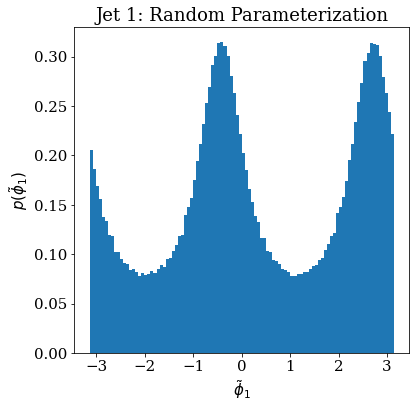

In [9]:
plt.rc('font', size=15)
plt.rcParams["font.family"] = "serif"



fig, ax = plt.subplots(figsize=(6,6))
graph_phi1(ax, np.random.randint(0, N))
plt.title("Jet 1: Random Parameterization")
plt.savefig('KL_rand1.pdf', bbox_inches='tight')

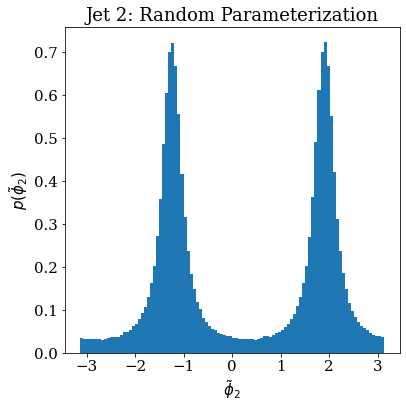

In [12]:
plt.rc('font', size=15)
plt.rcParams["font.family"] = "serif"



fig, ax = plt.subplots(figsize=(6,6))
graph_phi2(ax, np.random.randint(0, N))
plt.title("Jet 2: Random Parameterization")


plt.savefig('KL_rand2.pdf', bbox_inches='tight')

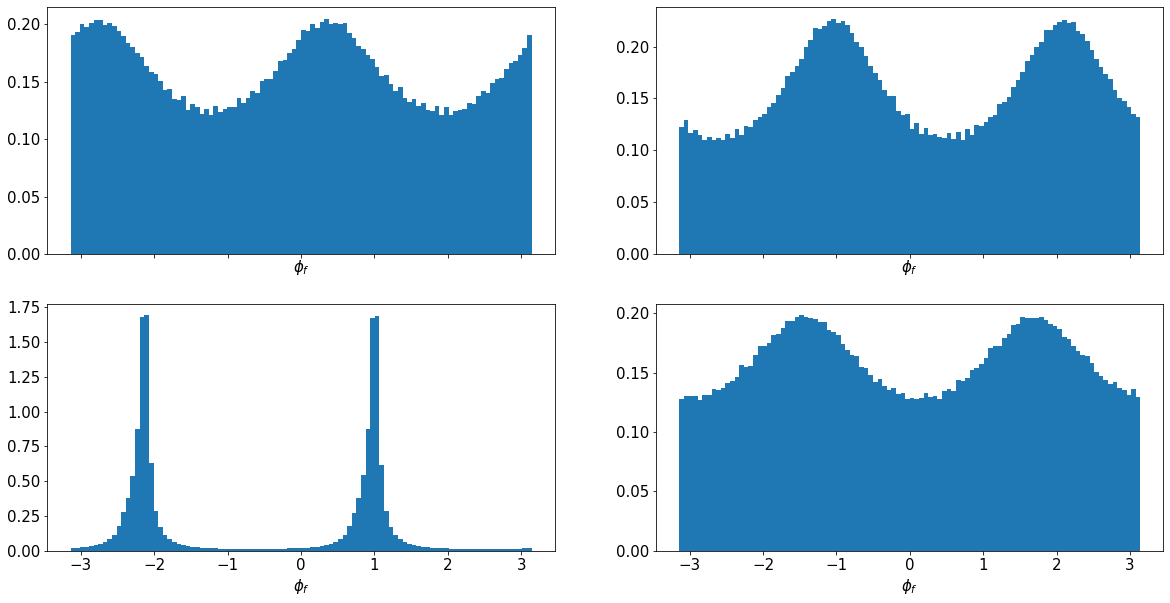

In [13]:
plt.rc('font', size=15)
fig, axes = plt.subplots(nrows = 2, ncols = 2, sharex = "all", figsize = (20, 10), squeeze=False)

#loop over axes, we have to flatten the array "axes", if "fig" contains more than one row
for i, ax in enumerate(axes.flatten()):
    #generate random length for data
    j = np.random.randint(0, N)
    graph_phi_f(ax, j, i)

plt.savefig('KL_rand.pdf', bbox_inches='tight')

In [8]:
#Test

t1f =  [-0.121126175, 3.9099712, 5.512944, 4.559253, 1.4167271, 2.7279987, 6.304571, 2.4213333, 1.4671254, 2.1283963, 3.791819, 5.3069744, 1.7942721, 5.614301, 4.288953, 1.9761542, 0.84010583, 4.7622886, 6.5612864, 0.038120262, 5.5788875, 0.22956586, 4.2354302, 5.067194, 2.4287202, 5.7598033, 4.523249, 6.0579596, 0.31869808, 0.3806679, -0.021471983, -0.26547262, 5.5394106, 6.688596, 4.643363, 1.1588823, 3.953312, 3.88908, 1.22682, 5.665076, 3.8037875, 4.964166, 3.5878973, 2.4434438, 1.485535, 4.303644, 1.9892104, 3.6374931, 6.6114335, 2.023343, 0.82186425, 4.9626336, 0.75526375, 2.0909038, 1.4860681, 5.595909, 6.6317663, 5.615341, 4.0039654, 5.505885, 0.8429617, 4.118614, 2.3207054, 6.2012143, 0.5458555, 6.819613, 5.590299, 3.0352478, 3.3090875, 4.861334, 4.6132026, 1.7378389, 0.37871057, 1.9407464, 4.144968, 3.369713, 3.9725363, 0.28393134, 6.374024, 0.5471496, 6.1267233, 2.868677, 2.4860282, 1.0312989, 1.9170743, 6.0553555, 4.7964373, 3.8095572, 1.3706783, 3.705665, 6.198295, 1.7611337, -0.15327172, 2.0261755, 0.80849904, 2.2520292, 0.055842668, 0.54724437, 4.638647, 2.1840527, 0.23676716, 4.842241, -0.39665014, 1.7535664, 2.4596176, 5.942515, 5.438557, 0.054563615, 0.08941801, 0.42317918, 3.157963, 3.8748333, 4.8185954, 5.7736635, 1.0656457, 4.7844596, 5.440651, 2.0513704, 0.108513944, 0.44675368, 0.8853404, 5.564956, 5.4245334, 1.6724766, 4.855691,3.413377, 6.639105, 3.2849567, 5.3288436, 2.2724175, 3.4888237, 3.7224724, -0.4343309, 3.447921, 5.7459254, 5.0914702, 2.5499563, 2.5950477, 5.1721873, -0.043087017, 5.589896, 6.523603, 5.099552, 6.075043, 2.4936564, 3.5569975, 0.9582025, 1.3234217, 3.4070334, 0.73211, 3.7461023, 1.2973293, 7.00151, 4.950013, 3.3250487, 2.1855698, 1.894216, 4.16928, 0.23495224, 5.2137384, 1.3233547, 3.4824955, 2.399103, 2.9344518, 4.6922493, 1.120424, 1.950616, 5.0580635, 4.7495384, 3.9962974, 4.219151, 4.8223248, 4.2134285, 0.34789404, 3.8035822,
       3.0573366, 6.3302813, 4.2207575, 5.5949354, 5.221025, 5.8259606, -0.710074, 2.6442294, 5.083866, 5.5990386, 2.099508, 0.47219816, 4.2995424, 0.32183295, -0.09671503, 2.542963, 0.18074869, 4.0172696, 1.7382334, 6.234951, 3.5555189, 4.4428825, 2.9585996, 3.2008836, 0.011673117, 1.0991544, 4.860899, 2.6267571, 6.097968, 5.126798, 2.3265142, 0.101998, -0.5229961, 4.5055947, 0.39153856, 1.985886, 5.87686, 4.89934, 1.6894623, 0.32915905, 6.434055, 3.143882, 5.6088643, 3.8192067, 1.9674549, 0.8125971, 3.1405258, 4.6721683, 4.2522798, 2.4567387
       ]
t2f =  [3.248753, 3.7196968, 5.5485044, 5.1355405, 4.444682, 4.901626, 0.77997154, 5.0843487, 4.9820323, 3.0358062, 3.7774353, 1.3930894, 0.30241445, -0.43874744, 3.9613945, 0.12353011, 6.419239, 1.9689331, 6.7716503, 3.6509616, 3.836613, 0.9583441, -0.36944893, 1.2413545, 2.0720465, 0.86788684, 3.417927, 4.4064198, 1.0056672, 2.877893, 3.5405192, 3.1416762, 2.4304855, 3.0267353, 5.2616353, 5.2616334, 2.7870283, 5.8168263, -0.582424, 6.798914, 4.9787884, 6.5577273, 5.9822335, 2.3556442, 5.866405, 1.8535063, 4.1700363, 6.61424, 0.6026165, 2.0563662, 0.07796714, 5.09795, 3.4972608, 3.356905, 0.5671177, 6.763571, 3.198208, 2.5075557, 6.3308234, 0.28894195, 1.3755258, 4.9549365, 4.976529, 4.210649, 0.53323877, 1.2381806, 3.577056, 1.9578545, 5.1339564, 2.3533864, 1.193189, 3.128363, 2.9912813, 0.74118537, 4.045928, 5.459544, 1.8923984, 3.859625, 0.40242302, 0.6338064, 4.099718, 4.8646045, 4.902281, 2.1226978, 2.9154546, 0.944539, 2.3206766, 4.968303, 4.3734136, 3.6137748, 1.1983932, 2.8243024, 1.3731593, 4.861555, 5.7082906, 4.9594674, 6.4634395, 6.0515647, 6.6150627, -0.4121492, 1.3389091, 2.49492, 6.061063, 2.6348093, 3.6643507, 1.3335849, 6.191738, 1.3837477, 1.1511437, 1.0242894, -0.30946755, 0.5017553, 6.4713836, 2.9484472, 4.2307205, 1.094421, 3.0625224, 2.1549757, 1.2454736, 4.563533, 3.1061509, 4.284146, 0.065691754, 5.9875937, 0.42096594,4.8364725, 3.2316854, 1.878105, -0.7615223, 3.422511, 2.5492508, 2.266589, 3.1033204, 6.3909545, 1.2341617, -0.42011598, 1.7644764, 1.7930607, 2.013588, 4.59397, 3.8071904, 3.0375881, 5.2167287, 4.5205007, 1.8422832, 5.4534554, 3.470494, 0.7235617, 5.9899397, 3.5047472, 6.1762524, 4.50338, 2.5580552, 3.3909955, -0.05167882, 5.3073893, 1.0607709, 1.9167204, 6.8367643, 2.138113, 3.1341019, 5.145744, 1.9101557, 4.979096, 5.183798, 4.4211826, 4.2319226, -0.7938761, 0.8732103, 5.3751655, 5.619063, 1.1944263, 1.0724062, -0.1384002, 2.40599,
       3.1487038, 4.0084386, 3.4121892, 0.6504498, 6.368197, 5.99379, 3.6215374, -0.11054103, 1.9982202, 1.3209256, 0.1701211, -0.24603005, 3.4412918, 4.3370705, 3.304764, 5.879533, 1.1122487, 6.323028, 6.7378263, 1.4207863, 4.9305854, 4.2403884, 4.974311, 2.10639, 4.3075967, 2.4112105, 5.0463314, 5.1084166, 3.1418269, 2.1384945, 4.996793, 1.3979406, 5.0819197, 6.0454297, 2.9490914, 5.198634, 7.676517, 4.0844727, 3.1324298, 0.87537736, 3.4942496, 4.925463, 4.533694, 3.4625719, 4.9992366, 4.254671, 4.933568, 1.9476048, 1.1075212, 4.8764367
       ]
t3f =  [3.6210308, 5.048145, 4.2859855, 1.2563632, 3.8674068, 7.1996465, 5.2218623, 2.848014, 5.4039836, 6.223199, 2.0135596, 6.6349416, 4.87303, 3.7912068, 2.1369214, 6.220013, 1.7750108, 5.09886, 1.9376698, 4.190419, 6.7977567, 5.0833545, 6.1263647, 3.8058317, 4.2722573, 4.0229173, 4.974627, 2.5967517, 2.2280893, 3.6125615, 4.159276, -0.0006755708, 2.1808271, 0.30827025, 4.45067, 5.167052, 0.28950676, 5.896637, 1.7575141, 1.2882704, 4.0109186, -0.05521815, 2.6775591, 2.5998387, 1.9713944, 3.076968, 4.248403, 1.0620259, 6.161128, 2.9695947, 3.2112732, 0.79186785, 4.2939396, 3.2789214, 6.2864556, 1.3275299, 6.134623, 5.2260733, 0.02825278, 1.1524866, 2.6276839, 3.1259978, 3.0402365, 4.115659, 3.7094796, 2.4811044, 1.8937956, 1.1250144, 1.0990584, 2.9188826, 3.675518, 4.503301, 3.5914211, 4.9532046, 5.56815, 1.2286355, 2.3347166, 5.4108357, 0.87000144, -1.1593657, 2.4734595, 2.806182, 5.772019, 4.2078404, -0.07575314, 3.6562264, 1.8930612, 3.2978928, 3.8022914, 2.2738464, 5.7255635, 3.090663, 0.9231839, 5.67457, 5.6950054, 2.4057813, 0.7989987, 5.1726766, 3.183838, 3.3813748, 2.5021777, 5.0962706, 6.872491, 6.226508, 3.8576746, 5.840754, 0.08528549, 3.5209987, 4.970765, 2.1192422, 2.1607103, 0.62157327, 6.269425, 2.7838857, 3.001003, 4.2574635, 3.0681934, 2.9348114, 3.8354816, 3.587837, 1.0592334, 2.194377, 1.3752217, 6.305854, 3.098531,0.6151286, 4.269937, 1.3645146, 0.79310745, 0.2527546, 1.8903396, 0.64233613, -0.099445246, 3.5492585, 3.5128958, 6.4802938, 0.2833726, 2.9922721, 2.1899261, 5.5060368, 0.51153886, 3.8637233, 4.238407, 5.676487, 5.968955, 1.212213, 2.945408, 0.0879454, -0.6708597, 5.948992, 1.3050743, 3.8716903, 0.73839515, 0.048429698, 4.1128063, 4.966994, 5.4534626, 0.11189578, 0.8525421, 2.1853144, 6.286424, 4.057021, 3.3318222, 5.6379647, 0.28946, 4.2545667, 3.867698, 4.4956346, 4.360972, 1.2377431, 4.3339047, 6.6152844, 0.98763734, 2.6641204, 6.8390274,
       3.2935977, 1.3107058, 4.9919863, 1.1598151, 4.5618176, 3.8963869, 6.721261, 1.9265273, 2.185344, 3.6110082, 4.872843, 5.3124914, 1.752544, 2.4514403, 5.298535, 3.609636, -0.8466278, 1.3579643, 1.8285545, 3.8400679, -0.1482704, 5.110688, 5.714886, 4.068664, 5.6112185, 1.2096553, 4.171114, 2.0433493, 6.336854, 2.5185394, 3.3420427, 5.4449277, 1.3710346, 4.562676, 3.6790113, 1.8963902, 3.9217186, 6.308989, 1.3359115, 1.9394351, 2.3090594, 3.432394, 6.256408, 2.7182224, 5.7098536, 2.9210591, 3.0921495, 2.4346817, 4.0429697, 2.8988945
       ]
t4f =  [2.65199, 4.3975124, 2.0078604, 1.9707259, 2.296003, 3.9343104, 4.18867, 1.1785948, 4.2702255, 6.347152, 4.2369146, 5.242095, 1.3875941, 5.626773, 4.1563, 3.193873, 1.3787833, 4.3172565, 4.365769, 2.0756283, 5.769172, 4.326558, 3.2896051, 5.419924, 5.1663756, 5.185371, 1.2127547, 2.6231134, 4.1733084, 5.08873, 2.1380825, -0.0018306496, 0.95713603, 2.8364303, 5.014741, 4.2273893, 2.8517966, 6.6705008, 4.5306334, 8.09692, 2.173319, 6.336803, 3.6033504, 6.8509555, 0.6600184, 3.423092, 2.0311887, 5.191794, 1.2221239, 3.2951236, 3.072292, 2.4028409, 5.1134734, 3.009544, 3.1446345, 1.8168286, 3.2921393, 4.2231007, 3.1056066, 1.9278796, 2.9749904, 2.832856, 6.0581164, 5.3123574, 2.5555718, 0.80457264, 4.3003006, 2.0206983, 5.00532, 3.3406274, 5.754124, 5.0154805, -0.4467204, 1.2996767, 3.8370938, 1.979151, 3.7970717, 0.8771242, -0.88657224, 1.2009593, 3.6590126, 3.593427, 4.201431, 5.193619, 3.2139833, 5.5432425, 1.2953452, 0.068193644, 5.397897, 0.87902683, 3.5993085, 0.041757036, 0.0673333, 0.6523749, 0.56986314, 1.0246309, 2.343173, 1.2311637, -0.033852607, 2.9020295, 2.5760474, 1.1372899, 5.68532, 6.339071, 2.430319, 6.6386685, 6.19817, 2.5220563, 4.8024693, 4.0498314, 4.101736, 5.6284103, 3.1553671, 0.35422143, 3.2289777, 1.9316593, 0.07260465, 0.22345315, -0.650923, 2.9346032, 5.0589685, 0.7129861, 2.0015771, 6.2659507, 3.1778915,0.41187847, 1.9903486, 2.1131172, -0.7993389, 2.8899517, 1.2492498, 2.4727364, 3.2427008, 2.7323048, 3.0544403, -0.19010429, 3.353681, 5.2035766, 4.0183434, 2.328272, 2.6286209, 2.4180896, 2.0513182, 3.4144266, 0.16787232, 1.9808865, 3.336173, 6.1828012, 0.660768, 0.33532125, 4.965147, 5.5768175, 5.55182, -0.061681528, 2.1437874, 4.4438844, 4.061929, 2.9898114, 5.417759, 4.059257, 6.27879, 5.436357, 3.040964, 5.8056164, 6.008327, 2.0586307, 2.4458694, 4.918149, 1.8966187, 5.0310054, 5.0003037, 2.7589066, 5.238869, 0.47372407, 2.6935961,
       6.1327415, 1.8575163, 4.3855877, 5.0523763, 4.870057, 2.3590581, 5.8619857, 1.0663195, 0.95093954, 2.5644884, 1.3001351, 4.1442757, 1.4117142, 3.86924, 0.9759594, 5.8274374, 3.8887599, 1.7935932, 1.374029, 3.473437, 1.9705834, 4.2852273, 3.6852705, 2.5285885, 3.5472195, 1.8912127, 5.29865, 0.9192266, 3.0978584, 6.918799, 2.8785858, 6.45473, 1.9069501, 1.7220262, 2.6099315, 4.4453506, 5.911805, 3.1033328, 5.035078, 4.364821, 0.8223698, 5.7680883, 6.1188216, 0.41075534, 3.2633479, 3.475297, 4.3329797, 0.55973744, 5.3529, 6.204096
       ]
t5f =  [6.387846, 2.5749526, 5.55432, 4.2632694, 1.3101554, 4.51704, 2.3639793, 1.2284046, 1.2842859, 3.0298557, 0.6537075, 4.5316143, 3.4487414, 3.595515, 0.94988275, -0.12404027, 3.0220697, 1.1907619, 0.48970085, 0.47480556, 6.9649653, 2.0978355, 0.3715716, 5.001923, 4.2042155, 5.456345, 3.1027713, 1.3826607, 4.2271104, 2.0378985, 0.38304767, 3.138873, 3.8870249, 3.2578843, 1.0248114, 1.0570945, 0.35472253, 5.804631, 5.6924634, 2.6410553, 4.9550877, 3.409457, -0.2887352, 3.9623806, -0.17485066, 1.8717823, 1.0870528, 3.4651344, 4.1790366, 2.0688224, 0.07887314, 1.2006032, 6.063764, 6.498839, 5.7129936, 5.816847, -0.06005056, 3.745238, 3.0987368, 6.0080905, 4.531791, 1.8079649, 4.4804406, 5.237151, 0.549153, 1.9013004, 3.5835578, 4.371802, 4.978067, -0.77254194, 1.9543822, -0.054295834, 3.2965064, 0.7600287, 2.2273707, 4.019832, 1.8506583, 0.6936458, 6.666467, 0.7178661, 4.364458, 4.9303484, 4.5326285, 4.169886, 0.22090824, 5.0388837, 7.1017222, 4.4515576, 5.288725, 5.8221397, 1.9458125, 3.4532244, 1.3246343, 4.8934393, 2.5662389, 1.2676846, 6.0878115, 2.9932842, 5.949719, 5.8794208, 1.3754557, 2.4787908, 6.0580335, 5.7778, 0.52834046, 4.5301476, -0.091811255, 4.523551, 4.743625, 4.3075323, 5.969234, 3.6432831, 2.951171, 3.3304856, 1.1625717, 1.0948596, 0.07997454, 0.9745496, 4.970131, 4.5846066, 3.242393, 5.0509477, -0.13940102, 5.985255, 0.4277731,4.836149, 3.2494762, 4.535639, 2.3536086, -0.2770803, 0.5786027, 0.87611777, 3.1865313, 6.3923182, 4.152153, 5.8469553, 4.439505, 1.4255619, 2.2756171, 4.8268423, 2.4883347, -0.109535456, 5.205717, 1.9095645, 4.9756665, 4.0937524, 3.464885, 0.72994816, 2.848679, 3.5066283, -0.09523654, 1.8616872, 5.685516, 3.399159, 3.0883245, 1.0072622, 2.0430834, 1.2328779, 0.5308492, 5.3049397, 3.1355603, 1.1441575, 1.8036739, 4.9452157, 2.0140245, 1.277424, 1.1001458, 3.8946204, 4.071209, 5.3142037, 0.7680776, 5.072285, 1.0848902, 3.2859375, 0.7699024,
       3.1323225, 2.1556025, 5.9060445, 3.6636744, 3.0750263, 2.8258867, 3.6200235, 0.062001165, 1.143705, 4.449154, 3.2965035, 0.271028, -0.31113714, 1.167669, 6.4501715, 3.5445106, 2.0878968, 3.0855792, 2.7310107, 1.4516633, 4.5042863, 5.165523, 4.518015, 5.106315, 1.8821176, 0.70464975, 1.2066021, 1.2379764, 3.1274347, 1.0389993, 1.8784448, 4.5354304, 2.8381107, 2.8715782, 6.0869837, 5.198148, 4.910834, 5.361932, 6.235062, 0.86577225, 2.7927704, 1.3269129, 1.3840958, -0.31880692, 4.4470544, 1.008739, 7.9767933, 1.1663867, 5.2009974, 1.3967235
       ]
t6f =  [0.25882995, 0.3932895, 6.458685, 4.203123, 2.9952543, 3.700658, 2.371143, 3.784301, 3.5041454, 2.0837293, 3.2290213, 3.5735242, 1.902793, 2.7457554, 3.3639276, 1.143077, 2.2193654, 3.9251845, 5.6603723, 0.559308, 0.9678819, 2.2620392, 5.0671177, 0.39863172, 4.787952, 1.6404276, 1.8997058, 2.9129837, 1.4056567, 0.7314916, 6.7309995, 6.0156164, 3.2868507, 2.8093197, 1.9918301, 3.4482918, 7.1912413, 4.0422473, 5.2037034, 4.0256057, 1.188235, 1.3811817, 3.7268836, 1.023212, 4.49891, 5.493552, 2.8086996, 3.2746003, 2.1036866, 1.513243, 0.84995854, 3.359031, 2.1858172, 4.127522, 1.4999615, 2.2160053, 3.5289106, 3.1427922, 7.133534, 2.1203945, 3.6142776, 0.65555537, 4.080257, 2.1692014, 7.0450892, 0.9371492, 1.034392, 5.3469067, 2.1934824, 1.1590046, 0.5137219, 1.3574318, 2.8809402, 3.996757, 5.7617064, 5.4492154, 0.6462068, 5.5662675, 0.4918771, -1.0303824, 2.1392555, 5.7613764, 2.2178133, 3.316771, 5.017422, 1.285713, 4.199694, 2.5188103, 0.2683997, 0.18893947, 1.1638534, 1.4505454, 2.3044763, 6.049627, 5.7265606, 4.0078144, 2.8546088, 0.43244353, 4.8560576, 2.0776734, 3.0174158, 1.0529817, 6.036284, 4.646179, 3.5082765, 1.9884163, 5.459989, 4.198951, 3.3082378, 1.5056968, 3.555331, 2.6961076, 1.6398027, 3.5622058, 4.495077, 2.215554, 2.3172636, 4.7752113, 1.4466215, 3.3484304, 5.221163, 5.2982597, 2.2317169, 1.5993172, 4.7829757,-0.06709769, -0.44308656, 5.692085, 0.27917218, 5.4950604, 5.5787954, 0.98216814, 3.5484784, 3.3443623, 3.1154826, 5.1958776, 2.6352706, 2.7459252, 6.321187, 0.058465686, 4.0945663, 6.2738123, 0.3519726, 0.7012042, 5.153245, 5.3229146, 1.0346816, 1.5368495, 2.709834, 0.822591, 2.4759457, 6.0666094, 5.886492, 4.9013367, 3.4254847, 4.8971586, 6.2734313, 1.8395975, 0.59393823, -0.006607695, 1.3233002, 1.6623572, 6.7619987, 6.1823163, 0.932815, 2.0246487, 3.5709643, 4.050663, 4.2046523, 1.7757843, 1.4549214, 5.580239, 3.0676253, 3.3423326, 1.1025193,
       6.323004, 3.5991044, 5.425412, 5.1299534, 4.226697, 0.16350813, 5.4173193, 5.650975, 3.1885984, 3.5708616, 2.1398215, 3.23795, 5.2449102, 4.9296503, 5.9824862, 5.536458, 1.5361949, 5.4317217, 1.2025826, 2.8295448, 3.7308156, -0.56548077, 2.19945, 1.6325014, 1.349665, 2.529672, 2.817421, 4.7038035, 3.3252888, 2.5562, 5.0035977, 2.2274606, 0.325552, 4.586793, 6.036004, 4.8328266, 7.0216064, 1.4807281, 1.6986314, 5.359634, 2.6818392, 2.291607, 2.3359835, 0.57662654, 3.5901678, 4.573318, 1.2668283, 2.9607, 6.181051, 2.6335006
       ]

T = np.array([t1f, t2f, t3f, t4f, t5f, t6f])

In [9]:
KL_symm1 = [entropy(np.histogram(phi1_i, bins=b)[0], 
                    np.histogram(np.arctan2(rotate(T[:,initnr], X)[:, 1],
                                            rotate(T[:,initnr], X)[:, 0]), bins=b)[0]) for initnr in range(N)]

KL_symm2 = [entropy(np.histogram(phi2_i, bins=b)[0], 
                    np.histogram(np.arctan2(rotate(T[:,initnr], X)[:, 3],
                                            rotate(T[:,initnr], X)[:, 2]), bins=b)[0]) for initnr in range(N)]

In [35]:
symm_mse = [mse(np.histogram(phi_i, bins=b)[0], np.histogram(np.arctan2(rotate(T[:,initnr], X)[:, 0], rotate(T[:,initnr], X)[:, 1]), bins=b)[0]) for initnr in range(N)]

NameError: name 'mse' is not defined

In [17]:
noise_mse = [mse(np.histogram(rng.uniform(-np.pi, np.pi, len(phi_i)), bins=b)[0],
                                 np.histogram(rng.uniform(-np.pi, np.pi, len(phi_i)), bins=b)[0]) for initnr in range(N)]

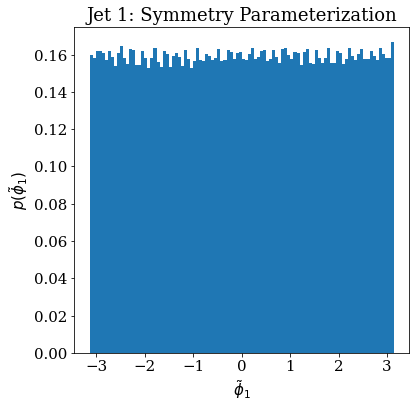

In [20]:
plt.rc('font', size=15)

plt.rcParams["font.family"] = "serif"



fig, ax = plt.subplots(figsize=(6,6))
graph_phi1(ax, np.random.randint(0, N))
plt.title("Jet 1: Symmetry Parameterization")


plt.savefig('KL_symm1.pdf', bbox_inches='tight')

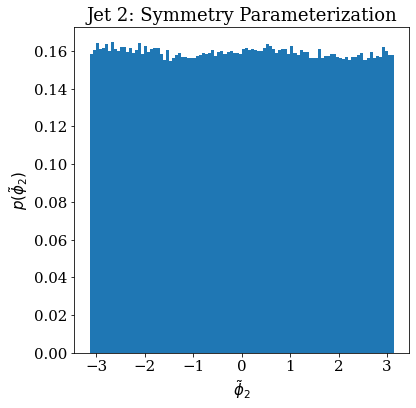

In [24]:
plt.rc('font', size=15)
plt.rcParams["font.family"] = "serif"



fig, ax = plt.subplots(figsize=(6,6))
graph_phi2(ax, np.random.randint(0, N))
plt.title("Jet 2: Symmetry Parameterization")


plt.savefig('KL_symm2.pdf', bbox_inches='tight')

In [35]:
KL_noise = [entropy(np.histogram(rng.uniform(-np.pi, np.pi, len(phi1_i)), bins=b)[0],
                                 np.histogram(rng.uniform(-np.pi, np.pi, len(phi1_i)), bins=b)[0]) for initnr in range(N)]

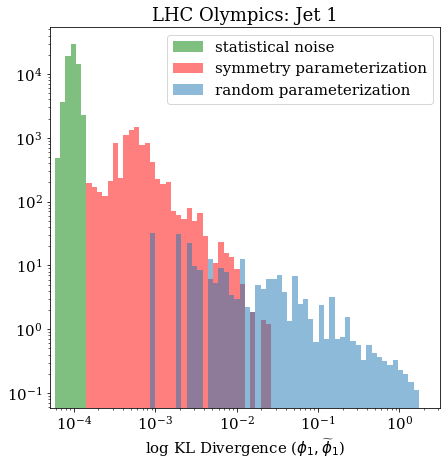

In [36]:
plt.rc('font', size=15)
fig, ax = plt.subplots(figsize=(7, 7))
bins=np.logspace(-4.3, 0.5, 75)

plt.hist(KL_noise, bins, label='statistical noise', color='g', alpha=0.5, density=True)
plt.hist(KL_symm1, bins, label='symmetry parameterization', color='r', alpha=0.5, density=True)
plt.hist(KL_rand1, bins, label='random parameterization', alpha=0.5, density=True)

plt.xlabel("log KL Divergence ($\phi_{1}, \widetilde\phi_{1}$)")
plt.xscale('log')
plt.yscale('log')
plt.xlim(10**-4.3, 10**0.5)
plt.legend()
plt.title("LHC Olympics: Jet 1")
plt.savefig('KL_Div1.pdf', bbox_inches='tight')
plt.show()

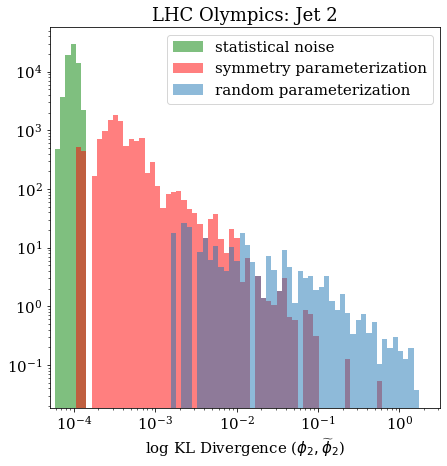

In [37]:
plt.rc('font', size=15)
fig, ax = plt.subplots(figsize=(7, 7))
bins=np.logspace(-4.3, 0.5, 75)


plt.hist(KL_noise, bins, label='statistical noise', color='g', alpha=0.5, density=True)
plt.hist(KL_symm2, bins, label='symmetry parameterization', color='r', alpha=0.5, density=True)
plt.hist(KL_rand2, bins, label='random parameterization', alpha=0.5, density=True)


plt.xlabel("log KL Divergence ($\phi_{2}, \widetilde\phi_{2}$)")
plt.xscale('log')
plt.yscale('log')
plt.xlim(10**-4.3, 10**0.5)
plt.legend()
plt.title("LHC Olympics: Jet 2")
plt.savefig('KL_Div2.pdf', bbox_inches='tight')
plt.show()

In [85]:
print("KL_noise mean = ", np.mean(KL_noise))
print("KL_symm1 mean = ", np.mean(KL_symm1))
print("KL_rand1 mean = ", np.mean(KL_rand1))

print("KL_noise mean = ", np.mean(KL_noise))
print("KL_symm2 mean = ", np.mean(KL_symm2))
print("KL_rand2 mean = ", np.mean(KL_rand2))


KL_noise mean =  9.881306164232015e-05
KL_symm1 mean =  0.0019711632591907745
KL_rand1 mean =  0.36240284021958724
KL_noise mean =  9.881306164232015e-05
KL_symm2 mean =  0.009000619760483627
KL_rand2 mean =  0.3436267656246946


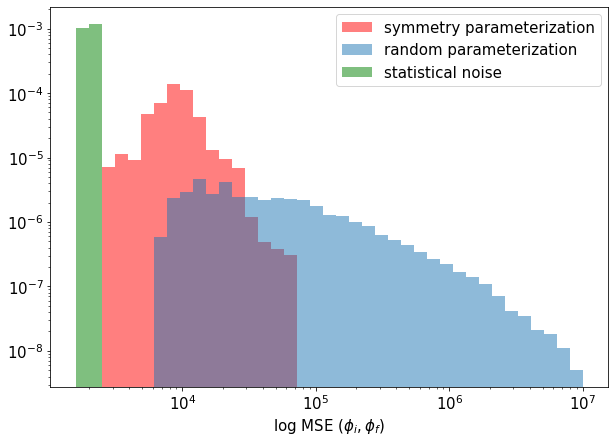

In [79]:
plt.rc('font', size=15)
fig, ax = plt.subplots(figsize=(10, 7))
bins= np.logspace(3.2, 7, 40)

plt.hist(symm_mse, bins, label='symmetry parameterization', color='r', alpha=0.5, density=True)
plt.hist(rand_mse, bins, label='random parameterization', alpha=0.5, density=True)
plt.hist(noise_mse, bins, label='statistical noise', color='g', alpha=0.5, density=True)

plt.xlabel("log MSE ($\phi_i, \phi_f$)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()
#plt.savefig('MSE100.pdf', bbox_inches='tight')

In [26]:
#Z2
#Test

t1i =  [1.3879149, 2.559474, 6.0210395, 3.0188105, 1.0306396, 5.7197323, 5.6285954, 3.7769117, 2.185092, 2.2458258, 1.2245271, 6.2515717, 1.9341102, 0.09970426, 3.7951345, 5.055072, 1.3017093, 0.14854148, 2.7204483, 3.770996, 3.9635699, 1.4605962, 0.017452776, 1.4454473, 6.1491117, 0.55613697, 6.2747636, 0.48987168, 2.8821306, 4.5546393]
t2i =  [1.1346927, 3.0994158, 0.9028616, 3.565328, 5.8515677, 1.1167089, 4.7563696, 0.9718593, 1.3849592, 4.992921, 5.185053, 5.4418387, 3.852503, 0.23187229, 5.6648183, 5.326702, 1.2028087, 1.131212, 5.6271, 5.2871675, 5.9497447, 4.989129, 2.5839794, 5.6778517, 5.8434753, 0.05433423, 2.441138, 0.9680595, 2.161818, 0.64331543]
t3i =  [5.5205655, 5.8745832, 5.695455, 3.9392366, 0.46226153, 2.150558, 1.0875348, 0.02660498, 3.9202228, 3.153801, 4.439947, 5.2596426, 0.74046034, 5.650669, 4.926661, 2.839827, 5.626025, 0.8005972, 4.4808664, 4.4136286, 4.8939185, 2.8538117, 0.7035369, 1.8294774, 4.92288, 0.6621539, 2.805657, 3.035336, 1.0765318, 2.4763236]
t4i =  [1.643784, 5.045862, 4.0108624, 5.7376304, 1.6271365, 3.8682578, 5.703143, 3.8816457, 4.32704, 1.4726156, 1.1661999, 0.8285736, 3.3602285, 4.1829724, 5.8291945, 1.8705533, 5.6242113, 2.5935166, 4.17881, 3.7235653, 3.9827147, 1.4160239, 2.7403593, 6.2652197, 1.7771572, 2.8320305, 3.9153504, 2.0707417, 4.251257, 3.5997167]
t5i =  [4.857058, 1.5333375, 3.934073, 2.033821, 2.8186126, 5.3896127, 4.163496, 3.0927157, 2.9762247, 1.012327, 5.2248907, 2.7845654, 5.805689, 3.1372416, 5.855237, 4.7848787, 5.537847, 4.1141596, 2.8556807, 5.945792, 0.5033682, 5.217685, 1.4884423, 5.759081, 3.9294987, 4.350647, 0.15717162, 2.630602, 1.8152806, 3.2093155]
t6i =  [4.0484557, 2.8672395, 3.4218469, 3.9369364, 2.043208, 2.9241233, 5.306031, 1.5264323, 0.7688008, 3.3419337, 3.408623, 1.5825776, 4.8728967, 1.4031843, 5.4556365, 3.546584, 3.1860752, 2.0499773, 4.9890885, 5.576729, 5.4130244, 0.98880047, 1.4471446, 2.7352638, 1.321884, 4.7067046, 1.577781, 5.982529, 6.0849776, 3.1603143]

t1f =  [1.847302, 3.01699, 5.758152, 3.5046654, 1.7907428, 6.4708977, 5.2947927, 3.905706, 1.0996995, 2.0608227, 1.0086751, 6.807768, 1.4572936, -0.04087097, 3.3572643, 5.7951727, 0.9560837, 0.108859114, 2.4287248, 3.2911131, 3.6770277, 2.2160532, -0.42943668, 0.7272995, 6.931723, 0.48592004, 6.64295, 0.7861847, 2.7737505, 4.2324815]
t2f =  [1.6104345, 3.4700162, 1.6097125, 3.21009, 7.0183144, 0.9789473, 4.707114, 1.8235354, 0.77168405, 4.6586547, 5.155064, 6.3256326, 4.8437324, 0.34396324, 5.2469807, 5.2514873, 1.4701573, 1.6410991, 5.3543487, 5.7759066, 5.572159, 4.723647, 1.8702334, 5.872835, 5.350241, -0.933537, 2.736559, 0.6984834, 1.9774591, 0.14319503]
t3f =  [6.035357, 6.4320755, 5.452762, 3.5251508, 0.08711203, 2.5389576, 0.2060384, -0.7312052, 5.432461, 3.1284015, 4.2247725, 5.9757013, 0.6127165, 5.7425885, 5.7768254, 3.5452073, 5.305557, 1.05104, 4.206095, 4.868677, 5.200356, 3.3655598, 0.6887358, 1.8684382, 5.603224, 0.2923785, 2.4687555, 2.7583225, 1.1948152, 2.688136]
t4f =  [1.1936982, 4.4025335, 4.340289, 6.345473, 0.6645334, 3.266291, 5.335712, 3.8454537, 5.0595074, 1.2911522, 0.92249095, 0.42050448, 2.8626926, 4.9353204, 6.4451528, 2.3472106, 5.958631, 2.5090353, 3.789691, 3.2511623, 3.6802928, 2.1747582, 3.1835697, 5.5003, 2.3922024, 3.3036652, 3.5796962, 1.777456, 4.358634, 3.157371]
t5f =  [4.7775245, 0.69300646, 4.6736794, 1.5152417, 2.5842893, 5.7500515, 4.714221, 3.7206798, 2.6640642, 1.3425658, 5.120297, 3.2944992, 4.837051, 2.5012422, 5.0928683, 4.6623235, 4.714519, 4.616961, 3.2297256, 6.490838, 0.7034771, 4.706327, 2.1284986, 6.4062076, 4.3762074, 5.43342, -0.17468658, 2.8385293, 1.9777269, 2.846178]
t6f =  [3.546082, 3.6161404, 3.7283711, 3.1993845, 2.507352, 2.8061159, 4.8733997, 2.3334107, -0.4277182, 3.3592434, 3.1860907, 1.0265148, 4.48937, 0.7067958, 6.3779697, 4.025679, 3.4446661, 1.7957954, 4.720949, 5.7225423, 5.7121058, 1.6699189, 1.2196974, 2.2357156, 0.6708464, 5.220066, 1.2279404, 6.275183, 5.976254, 3.6023457]

T = np.array([t1f, t2f, t3f, t4f, t5f, t6f])

In [27]:
X = np.transpose([px1, py1, px2, py2])

def rotation(t):
    s1 = np.sin(t[0])
    c1 = np.cos(t[0])
    s2 = np.sin(t[1])
    c2 = np.cos(t[1])
    s3 = np.sin(t[2])
    c3 = np.cos(t[2])
    s4 = np.sin(t[3])
    c4 = np.cos(t[3])
    s5 = np.sin(t[4])
    c5 = np.cos(t[4])
    s6 = np.sin(t[5])
    c6 = np.cos(t[5])
    R1 = np.array([[c1, s1, 0.0, 0.0], [-1.0*s1, c1, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]]) #px1 -> py1     
    R2 = [[c2, 0.0, s2, 0.0], [0.0, 1.0, 0.0, 0.0], [-1.0*s2, 0.0, c2, 0.0], [0.0, 0.0, 0.0, 1.0]] #px1 -> px2
    R3 = [[c3, 0.0, 0.0, s3], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [-1.0*s3, 0.0, 0.0, c3]] #px1 -> py2
    R4 = [[1.0, 0.0, 0.0, 0.0], [0.0, c4, s4, 0.0], [0.0, -1.0*s4, c4, 0.0], [0.0, 0.0, 0.0, 1.0]] #px2 -> py1
    R5 = [[1.0, 0.0, 0.0, 0.0], [0.0, c5, 0.0, s5], [0.0, 0.0, 1.0, 0.0], [0.0, -1.0*s5, 0.0, c5]] #px2 -> py1
    R6 = [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, c6, s6], [0.0, 0.0, -1.0*s6, c6]] #py1 -> py2
    S = R1 @ R2 @ R3 @ R4 @ R5 @ R6
    return S

In [28]:
for t in T.T:
    m = rotation(t) 
    print(np.linalg.norm(m @ m - np.identity(4)))

8.322389812404565e-05
2.6213390721480225e-06
0.00047208852512614917
1.3056182223392315e-05
3.7971480890980503e-06
1.9919070867370322e-05
0.005639993849166606
5.07493779637619e-05
1.1460197814448566e-06
9.465221917850343e-05
2.233608029127274e-06
4.265106511259768e-06
1.5182400454254324e-05
1.8541581917588818e-06
3.826700717035905e-05
1.3505074001267056e-05
0.00025105932176998217
0.00017536029015579566
2.0057289013620357e-06
1.1603807729941465e-05
2.0631022282813523e-05
0.004259738446888189
7.258988487016235e-06
1.9395259998991096e-06
9.760409158830406e-06
3.261189350810515e-05
7.410336517499628e-06
5.674296490902791e-06
2.841118327117046e-07
4.544957232206629e-06


In [29]:
n = [1, 0, -1, 0]

In [32]:
n2 = rotation(T[:, 0]) @ n 

array([ 0.97917365, -0.21003115, -0.97390999,  0.22046591])

In [41]:
np.round(rotation(T[:, 0]), 2)

array([[ 0.01,  0.04, -0.97,  0.25],
       [ 0.04,  0.04,  0.25,  0.97],
       [-0.97,  0.25,  0.01,  0.02],
       [ 0.25,  0.97,  0.02, -0.06]])

In [43]:
np.allclose(rotation(T[:, 0]) @ rotation(T[:, 0]).T, np.identity(4))

True

In [ ]:
n2 = rotation(T[:, 23]) @ n 
plt.scatter([1, -1], [0, 0])
plt.scatter([n2[0], n2[2]], [n2[1], n2[3]])


In [52]:
print(n2)

[-0.80138084  0.29955212 -1.06102781  0.37719657]
